In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [2]:
df = pd.read_csv('TSLA.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])
df.reset_index(drop=True, inplace=True)
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


In [4]:
df.shape

(3534, 5)

In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,3534.000000,3534.000000,3534.000000,3534.000000,3.534000e+03
mean,74.997811,76.642865,73.249666,74.985912,9.694511e+07
std,102.281381,104.556354,99.811577,102.217353,7.877581e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,11.448667,11.753834,11.191166,11.532334,4.749600e+07
50%,17.417334,17.645333,17.064000,17.400333,8.216325e+07
75%,159.177502,161.312500,153.632500,158.180004,1.228650e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3534 entries, 2010-06-29 to 2024-07-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3534 non-null   float64
 1   High    3534 non-null   float64
 2   Low     3534 non-null   float64
 3   Close   3534 non-null   float64
 4   Volume  3534 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 165.7 KB


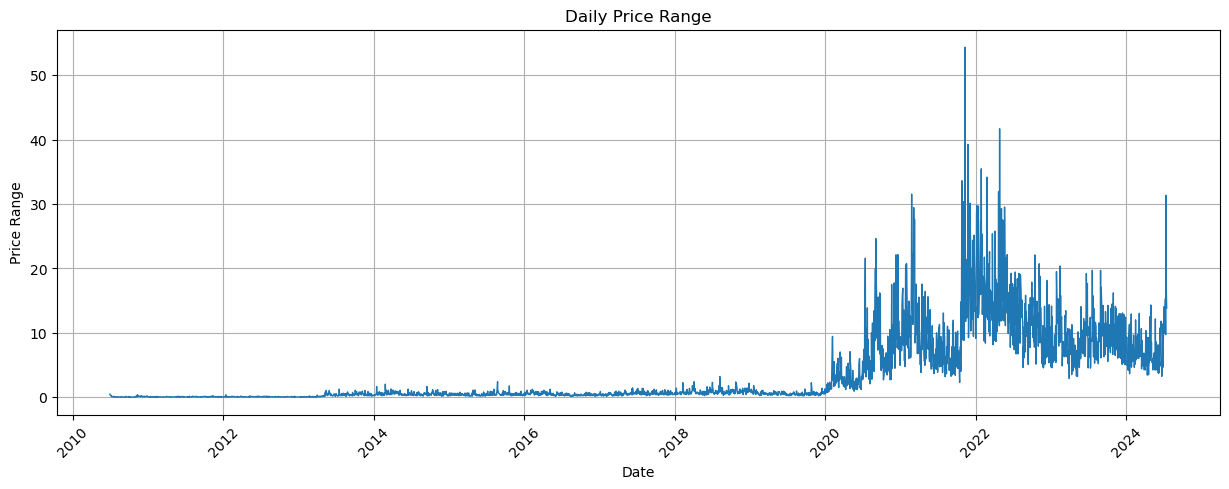

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['High'] - df['Low'], linewidth = 1)
plt.title('Daily Price Range')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

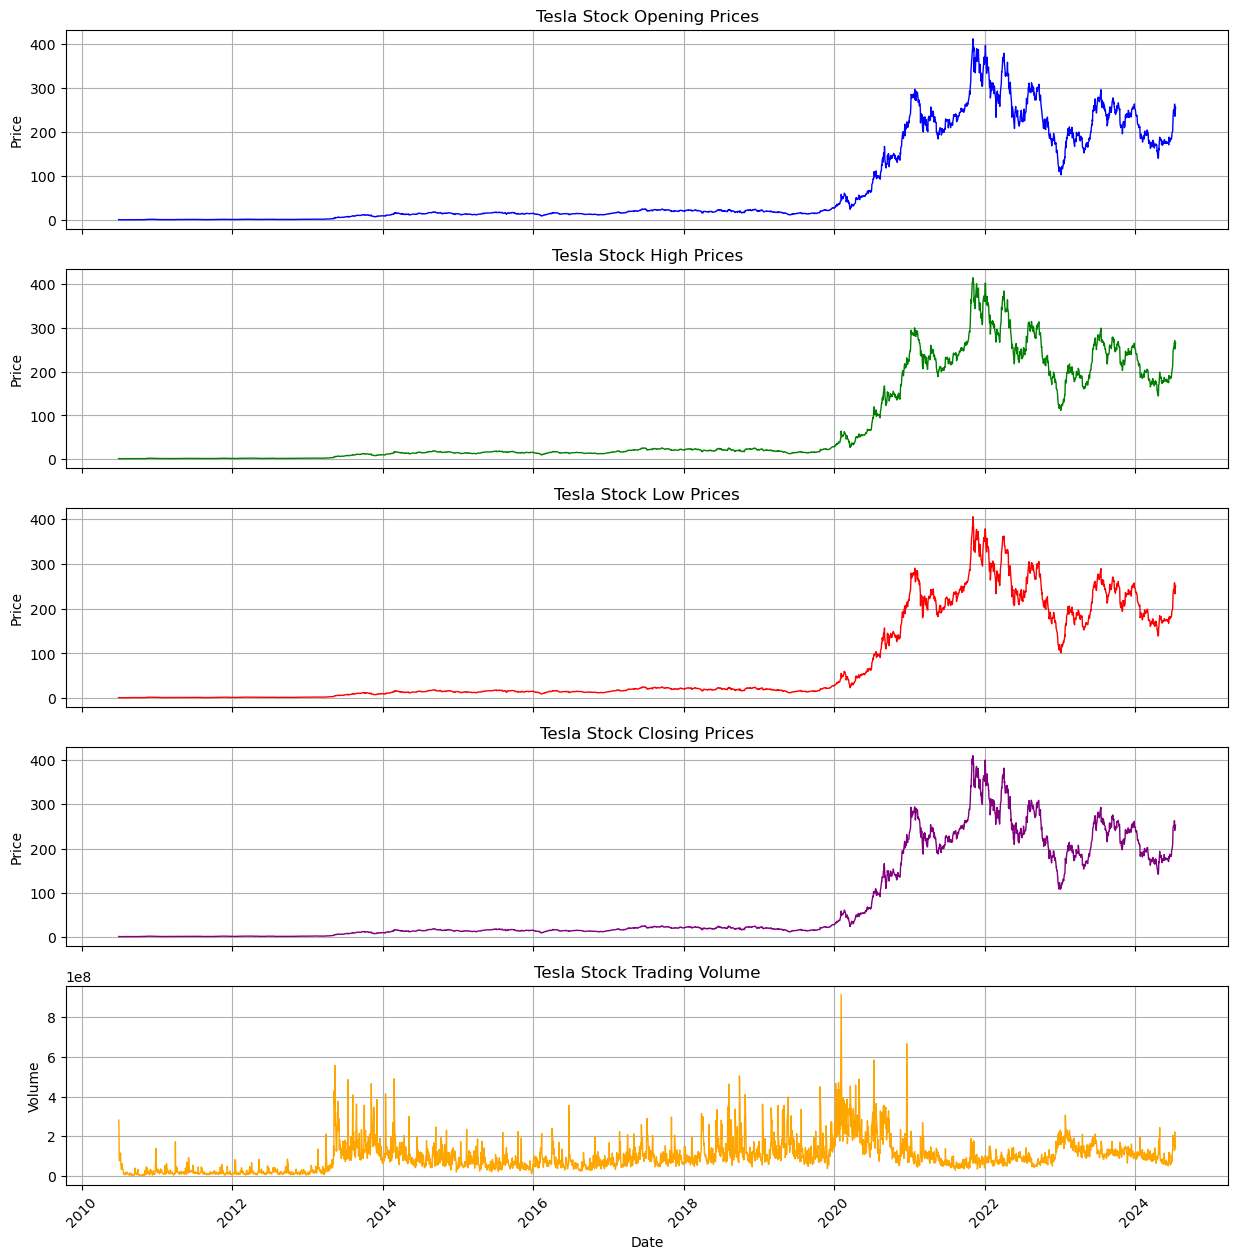

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

axes[0].plot(df.index, df['Open'], color='blue', linewidth=1)
axes[0].set_title('Tesla Stock Opening Prices')
axes[0].set_ylabel('Price')
axes[0].grid(True)

axes[1].plot(df.index, df['High'], color='green', linewidth=1)
axes[1].set_title('Tesla Stock High Prices')
axes[1].set_ylabel('Price')
axes[1].grid(True)

axes[2].plot(df.index, df['Low'], color='red', linewidth=1)
axes[2].set_title('Tesla Stock Low Prices')
axes[2].set_ylabel('Price')
axes[2].grid(True)

axes[3].plot(df.index, df['Close'], color='purple', linewidth=1)
axes[3].set_title('Tesla Stock Closing Prices')
axes[3].set_ylabel('Price')
axes[3].grid(True)

axes[4].plot(df.index, df['Volume'], color='orange', linewidth=1)
axes[4].set_title('Tesla Stock Trading Volume')
axes[4].set_ylabel('Volume')
axes[4].grid(True)
axes[4].set_xlabel('Date')  

plt.xticks(rotation=45)

plt.show()

In [9]:
def simple_moving_averages(window_size_in_days):
    i = 0
    moving_averages = [float('nan')]*(window_size_in_days - 1)
    while i < len(df) - window_size_in_days + 1:
        moving_average = sum(df['Close'][i : i + window_size_in_days]) / window_size_in_days
        moving_averages.append(moving_average)
        i += 1
    return moving_averages

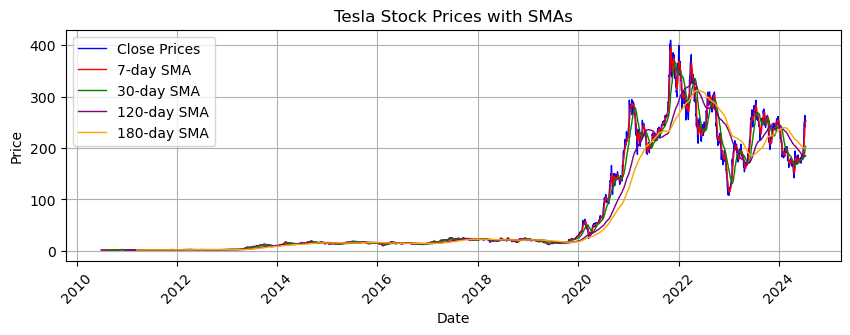

In [10]:
# Simple Moving Averages : 7-day (1 week), 30-day (1 month), 120-day (quarterly), and 180-day (biannually)

df['7-day SMA'] = simple_moving_averages(7)
df['30-day SMA'] = simple_moving_averages(30)
df['120-day SMA'] = simple_moving_averages(120)
df['180-day SMA'] = simple_moving_averages(180)

plt.figure(figsize = (10, 3))
plt.plot(df['Close'], label = 'Close Prices', linewidth = 1, color = 'blue')
plt.plot(df['7-day SMA'], label = '7-day SMA', linewidth = 1, color = 'red')
plt.plot(df['30-day SMA'], label = '30-day SMA', linewidth = 1, color = 'green')
plt.plot(df['120-day SMA'], label = '120-day SMA', linewidth = 1, color = 'purple')
plt.plot(df['180-day SMA'], label = '180-day SMA',linewidth = 1, color = 'orange')
plt.title('Tesla Stock Prices with SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [11]:
def exponential_moving_averages(window_size_in_days):
    alpha = 2 / (window_size_in_days + 1)
    df[f'{window_size_in_days}-day EMA'] = df['Close'].ewm(alpha = alpha, adjust = False).mean()

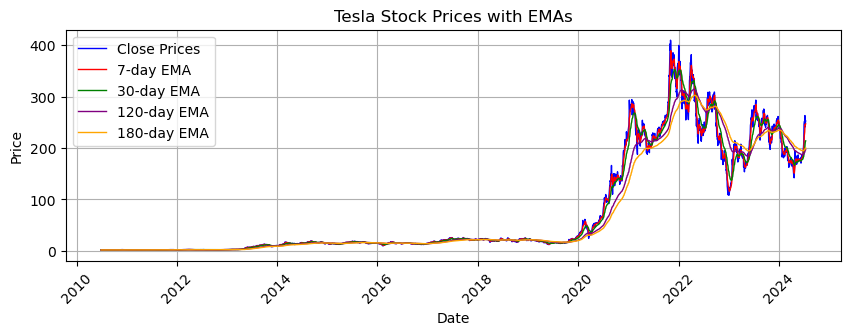

In [12]:
# Exponential Moving Averages : 7-day (1 week), 30-day (1 month), 120-day (quarterly), and 180-day (biannually)

exponential_moving_averages(7)
exponential_moving_averages(30)
exponential_moving_averages(120)
exponential_moving_averages(180)

plt.figure(figsize = (10, 3))
plt.plot(df['Close'], label = 'Close Prices', linewidth = 1, color = 'blue')
plt.plot(df.index, df['7-day EMA'], label = '7-day EMA', linewidth = 1, color = 'red')
plt.plot(df['30-day EMA'], label = '30-day EMA', linewidth = 1, color = 'green')
plt.plot(df['120-day EMA'], label = '120-day EMA', linewidth = 1, color = 'purple')
plt.plot(df['180-day EMA'], label = '180-day EMA',linewidth = 1, color = 'orange')
plt.title('Tesla Stock Prices with EMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [13]:
df.head()

,Open,High,Low,Close,Volume,7-day SMA,30-day SMA,120-day SMA,180-day SMA,7-day EMA,30-day EMA,120-day EMA,180-day EMA
Date,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,NaN,NaN,NaN,NaN,1.592667,1.592667,1.592667,1.592667
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,NaN,NaN,NaN,NaN,1.591667,1.592409,1.592601,1.592623
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,NaN,NaN,NaN,NaN,1.559750,1.584124,1.590475,1.591202
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,NaN,NaN,NaN,NaN,1.489813,1.564504,1.585343,1.587763
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,NaN,NaN,NaN,NaN,1.385860,1.532858,1.576891,1.582086


In [14]:
df.isnull().sum() # Checking if dataset contains any missing values

Open             0
High             0
Low              0
Close            0
Volume           0
7-day SMA        6
30-day SMA      29
120-day SMA    119
180-day SMA    179
7-day EMA        0
30-day EMA       0
120-day EMA      0
180-day EMA      0
dtype: int64

In [15]:
df['Daily Returns'] = df['Close'].pct_change() * 100
df.head()

,Open,High,Low,Close,Volume,7-day SMA,30-day SMA,120-day SMA,180-day SMA,7-day EMA,30-day EMA,120-day EMA,180-day EMA,Daily Returns
Date,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,NaN,NaN,NaN,NaN,1.592667,1.592667,1.592667,1.592667,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,NaN,NaN,NaN,NaN,1.591667,1.592409,1.592601,1.592623,-0.251148
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,NaN,NaN,NaN,NaN,1.559750,1.584124,1.590475,1.591202,-7.847274
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,NaN,NaN,NaN,NaN,1.489813,1.564504,1.585343,1.587763,-12.568307
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,NaN,NaN,NaN,NaN,1.385860,1.532858,1.576891,1.582086,-16.093748


In [16]:
df = df.dropna(subset=['Daily Returns'])
df.head()

,Open,High,Low,Close,Volume,7-day SMA,30-day SMA,120-day SMA,180-day SMA,7-day EMA,30-day EMA,120-day EMA,180-day EMA,Daily Returns
Date,,,,,,,,,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,NaN,NaN,NaN,NaN,1.591667,1.592409,1.592601,1.592623,-0.251148
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,NaN,NaN,NaN,NaN,1.559750,1.584124,1.590475,1.591202,-7.847274
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,NaN,NaN,NaN,NaN,1.489813,1.564504,1.585343,1.587763,-12.568307
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,NaN,NaN,NaN,NaN,1.385860,1.532858,1.576891,1.582086,-16.093748
2010-07-07,1.093333,1.108667,0.998667,1.053333,103825500,NaN,NaN,NaN,NaN,1.302728,1.501921,1.568238,1.576243,-1.924298


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3533 entries, 2010-06-30 to 2024-07-15
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3533 non-null   float64
 1   High           3533 non-null   float64
 2   Low            3533 non-null   float64
 3   Close          3533 non-null   float64
 4   Volume         3533 non-null   int64  
 5   7-day SMA      3528 non-null   float64
 6   30-day SMA     3505 non-null   float64
 7   120-day SMA    3415 non-null   float64
 8   180-day SMA    3355 non-null   float64
 9   7-day EMA      3533 non-null   float64
 10  30-day EMA     3533 non-null   float64
 11  120-day EMA    3533 non-null   float64
 12  180-day EMA    3533 non-null   float64
 13  Daily Returns  3533 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 414.0 KB


In [18]:
# Calculating Bollinger Bands
df['20-day SMA'] = df['Close'].rolling(window=20).mean()
df['20-day STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['20-day SMA'] + (df['20-day STD'] * 2)
df['Lower Band'] = df['20-day SMA'] - (df['20-day STD'] * 2)

In [19]:
# Calculating True Range and Actual True Range
df['Previous_Close'] = df['Close'].shift(1)

df['TR'] = df.apply(lambda row: max(
    row['High'] - row['Low'], 
    abs(row['High'] - row['Previous_Close']), 
    abs(row['Low'] - row['Previous_Close'])), axis=1)

df['ATR'] = df['TR'].rolling(window=14).mean()

df = df.drop(columns=['Previous_Close'])

In [20]:
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

In [21]:
df.head()

,Open,High,Low,Close,Volume,7-day SMA,30-day SMA,120-day SMA,180-day SMA,7-day EMA,...,120-day EMA,180-day EMA,Daily Returns,20-day SMA,20-day STD,Upper Band,Lower Band,TR,ATR,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,NaN,NaN,NaN,NaN,1.591667,...,1.592601,1.592623,-0.251148,NaN,NaN,NaN,NaN,0.474667,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,NaN,NaN,NaN,NaN,1.559750,...,1.590475,1.591202,-7.847274,NaN,NaN,NaN,NaN,0.376667,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,NaN,NaN,NaN,NaN,1.489813,...,1.585343,1.587763,-12.568307,NaN,NaN,NaN,NaN,0.292667,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,NaN,NaN,NaN,NaN,1.385860,...,1.576891,1.582086,-16.093748,NaN,NaN,NaN,NaN,0.278000,NaN,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,103825500,NaN,NaN,NaN,NaN,1.302728,...,1.568238,1.576243,-1.924298,NaN,NaN,NaN,NaN,0.110000,NaN,NaN


In [22]:
df.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
7-day SMA          5
30-day SMA        28
120-day SMA      118
180-day SMA      178
7-day EMA          0
30-day EMA         0
120-day EMA        0
180-day EMA        0
Daily Returns      0
20-day SMA        19
20-day STD        19
Upper Band        19
Lower Band        19
TR                 0
ATR               13
RSI               13
dtype: int64

In [23]:
df.dropna(inplace=True) #Removing all null values

In [24]:
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
7-day SMA        0
30-day SMA       0
120-day SMA      0
180-day SMA      0
7-day EMA        0
30-day EMA       0
120-day EMA      0
180-day EMA      0
Daily Returns    0
20-day SMA       0
20-day STD       0
Upper Band       0
Lower Band       0
TR               0
ATR              0
RSI              0
dtype: int64

In [25]:
df.describe()

,Open,High,Low,Close,Volume,7-day SMA,30-day SMA,120-day SMA,180-day SMA,7-day EMA,...,120-day EMA,180-day EMA,Daily Returns,20-day SMA,20-day STD,Upper Band,Lower Band,TR,ATR,RSI
count,3355.000000,3355.000000,3355.000000,3355.000000,3.355000e+03,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,...,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000
mean,78.914796,80.645491,77.075917,78.902526,1.008899e+08,78.678771,77.957211,75.592924,73.821760,78.683057,...,75.443938,73.605919,0.214395,78.243434,5.036427,88.316287,68.170581,3.908349,3.875787,53.285708
std,103.521946,105.825618,101.019307,103.455585,7.853851e+07,103.221548,102.525283,100.651190,99.286582,103.155617,...,99.635018,97.754019,3.545248,102.793586,7.841586,116.362129,89.915635,6.136590,5.479552,17.931076
min,1.462000,1.484667,1.433333,1.463333,3.594000e+06,1.504572,1.557956,1.698478,1.575711,1.507989,...,1.634303,1.624959,-21.062824,1.565300,0.034269,1.687434,1.357143,0.025333,0.050857,5.139218
25%,13.137000,13.358000,12.888667,13.109000,5.332950e+07,13.175572,13.342600,13.762572,12.706941,13.198370,...,13.528023,12.849980,-1.559256,13.272717,0.480429,14.371707,11.918896,0.348000,0.447500,40.612138
50%,18.506666,18.760000,18.220667,18.492666,8.516660e+07,18.436952,18.407222,17.671617,17.702437,18.432979,...,17.934321,17.986109,0.125800,18.400267,0.879789,20.482541,16.524773,0.685335,0.677095,53.187299
75%,172.269997,175.220001,167.529999,171.839996,1.255782e+08,171.517145,170.195666,173.977000,173.907040,172.318460,...,187.347002,183.214410,1.912793,169.987916,7.608185,189.815157,143.379191,6.231667,7.434882,66.070173
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,396.351907,367.634444,332.151804,312.319740,389.457319,...,314.959280,302.713525,24.395076,373.152498,53.380066,441.060656,330.937649,54.326660,24.814054,97.529933


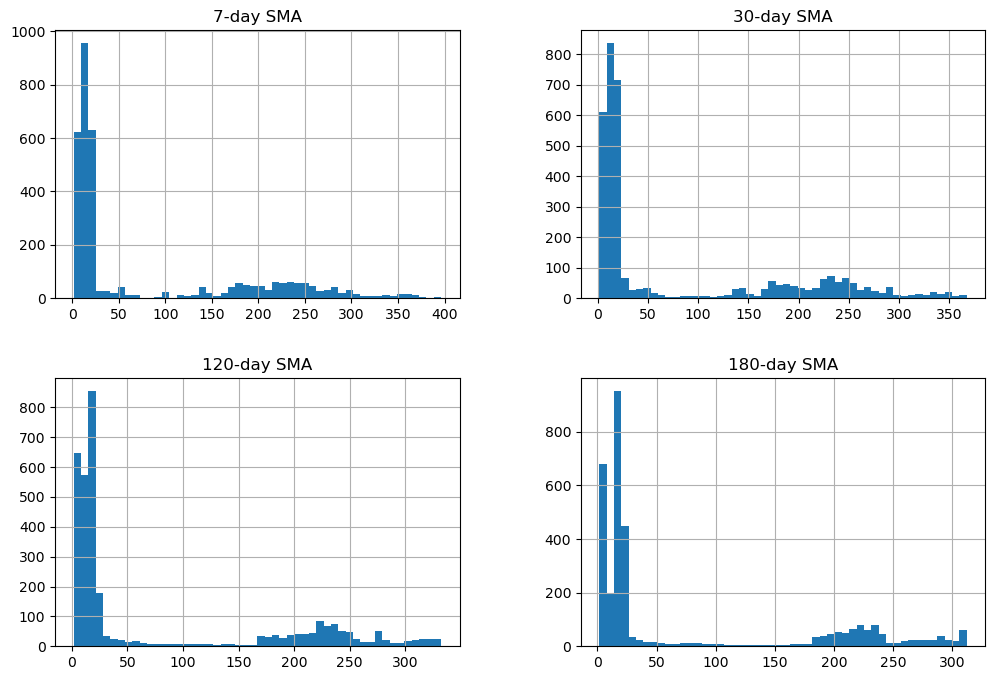

In [26]:
df[['7-day SMA', '30-day SMA', '120-day SMA', '180-day SMA']].hist(bins=50, figsize=(12, 8))
plt.show()

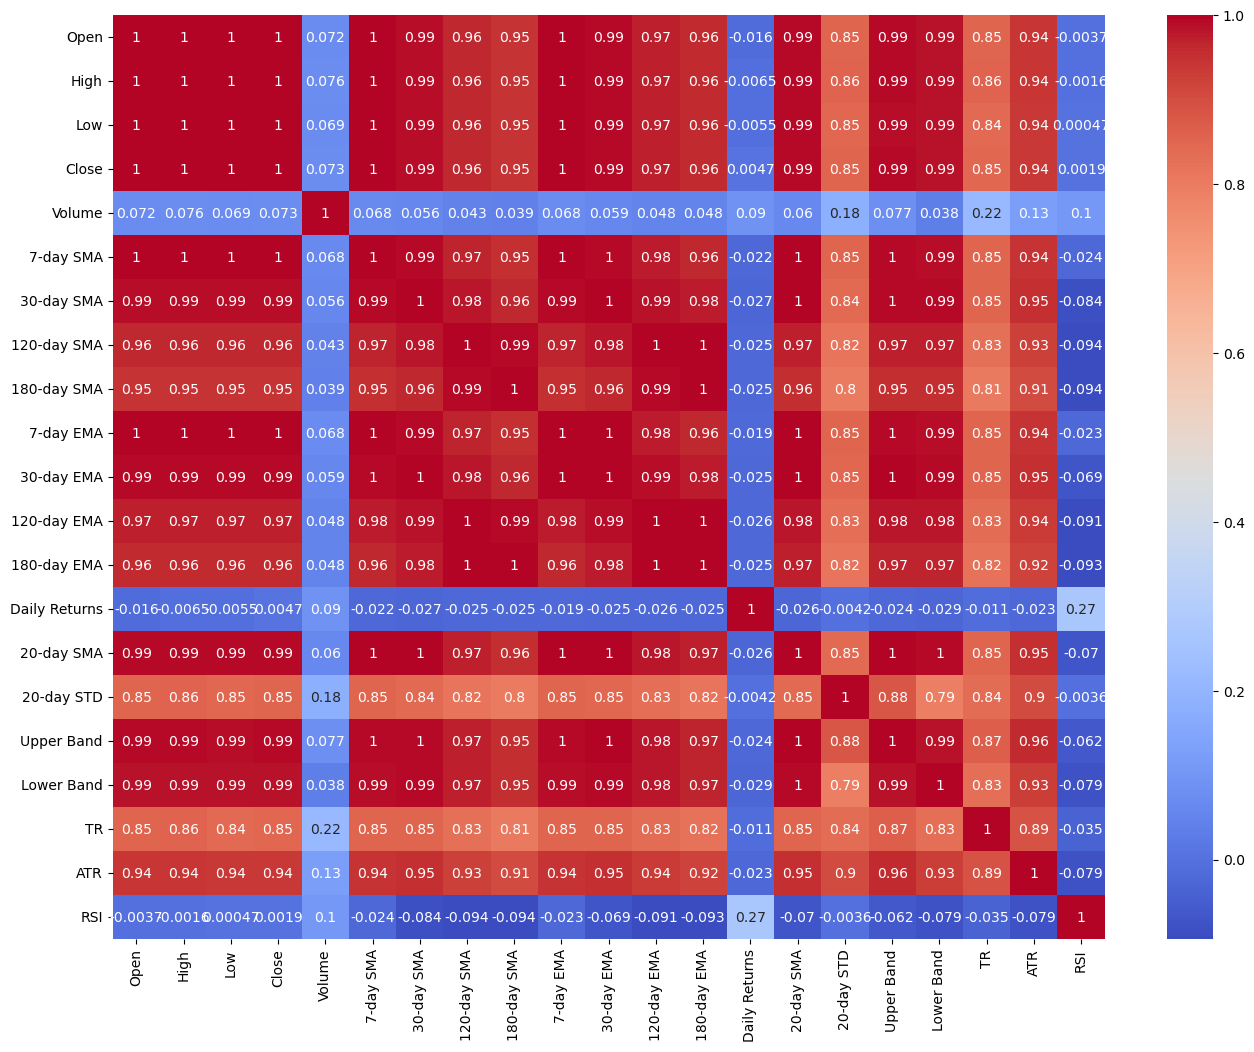

In [27]:
plt.figure(figsize=(16, 12))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Analyzing Performance of Standard Models

In [28]:
metrics = []

In [29]:
# Defining X and y
X = df.drop(['Close'], axis = 1)
y = df['Close']

In [30]:
# Perfroming train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)
mape = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")
metrics.append([mse, rmse, mae, mape, r2])

MSE: 8.824018642073776
RMSE: 2.9705249775206024
MAE: 2.3208474097481844
R-squared: 0.9975294285921467
MAPE: 0.9915686431757609


### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)
rfr_pred = rfr.predict(X_test_scaled)

In [35]:
mse = mean_squared_error(y_test, rfr_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rfr_pred)
r2 = r2_score(y_test, rfr_pred)
mape = np.mean(np.abs((y_test - rfr_pred) / y_test)) * 100
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")
metrics.append([mse, rmse, mae, mape, r2])

MSE: 311.74998536158625
RMSE: 17.656443168474965
MAE: 12.961151374327976
R-squared: 0.9127154382289449
MAPE: 5.615632471523774


### Gradient Boosting Regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)
gbr_pred = gbr.predict(X_test_scaled)

In [37]:
mse = mean_squared_error(y_test, gbr_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, gbr_pred)
r2 = r2_score(y_test, gbr_pred)
mape = np.mean(np.abs((y_test - gbr_pred) / y_test)) * 100
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")
metrics.append([mse, rmse, mae, mape, r2])

MSE: 363.0289906858135
RMSE: 19.053319676261495
MAE: 13.196326360989492
R-squared: 0.8983582105851668
MAPE: 5.5702694216606545


### Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_


svr_pred = best_model.predict(X_test_scaled)

In [39]:
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"MAPE: {mape}")
metrics.append([mse, rmse, mae, mape, r2])

MSE: 13.439064019911772
RMSE: 3.665932898991984
MAE: 2.748957113305504
R-squared: 0.9962372963314478
MAPE: 1.15349991206164


In [40]:
algos = ['LR', 'RF Regressor', 'GB Regressor', 'SVM']
columns = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2']

In [41]:
metrics = pd.DataFrame(metrics, columns=columns)
metrics.index = algos
metrics

,MSE,RMSE,MAE,MAPE,R2
LR,8.824019,2.970525,2.320847,0.991569,0.997529
RF Regressor,311.749985,17.656443,12.961151,5.615632,0.912715
GB Regressor,363.028991,19.053320,13.196326,5.570269,0.898358
SVM,13.439064,3.665933,2.748957,1.153500,0.996237


### Last Date in the dataset is 15th July, 2024 - The trained models will be used to predict the Stock prices for 16th July, 2024

In [42]:
def sma(window):
    return df['Close'].tail(window).rolling(window=window).mean().iloc[-1]

In [43]:
def ema(window):
    alpha = 2 / (window + 1)
    return df['Close'].ewm(alpha = alpha, adjust = False).mean().iloc[-1]

In [44]:
# Predicting the Close Prices for 16th July 2024 using the above models
X_16thJuly = [255.31, 258.62, 245.80, 256.56, 126332500, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
index_16thJuly = pd.Timestamp('2024-07-16')

In [45]:
_16thJuly_df = pd.DataFrame([X_16thJuly], columns = df.columns, index = [index_16thJuly])
_16thJuly_df

,Open,High,Low,Close,Volume,7-day SMA,30-day SMA,120-day SMA,180-day SMA,7-day EMA,...,120-day EMA,180-day EMA,Daily Returns,20-day SMA,20-day STD,Upper Band,Lower Band,TR,ATR,RSI
2024-07-16,255.31,258.62,245.8,256.56,126332500,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [46]:
df = pd.concat([df, _16thJuly_df])
df.tail()

,Open,High,Low,Close,Volume,7-day SMA,30-day SMA,120-day SMA,180-day SMA,7-day EMA,...,120-day EMA,180-day EMA,Daily Returns,20-day SMA,20-day STD,Upper Band,Lower Band,TR,ATR,RSI
2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400,245.365714,196.318333,184.105667,200.392056,245.197401,...,194.077046,198.589468,0.354524,206.2235,32.008351,270.240202,142.206798,9.730011,10.623570,95.666371
2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300,249.818571,198.461000,184.348583,200.553389,244.155551,...,194.853128,199.058424,-8.444128,209.7420,31.760029,273.262058,146.221942,31.350006,12.466427,78.373732
2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400,252.242857,200.862333,184.648917,200.754222,245.174162,...,195.735391,199.601756,2.987179,213.2890,31.905995,277.100991,149.477009,18.750000,13.572856,79.500632
2024-07-15,255.964996,265.579987,251.729996,252.639999,142831728,253.135714,203.324000,185.014250,200.954889,247.040621,...,196.675963,200.187814,1.776580,216.7975,32.195421,281.188341,152.406658,17.349991,14.365713,80.588537
2024-07-16,255.310000,258.620000,245.800000,256.560000,126332500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.loc[df.index[-1], '7-day SMA'] = sma(7)
df.loc[df.index[-1], '30-day SMA'] = sma(30)
df.loc[df.index[-1], '120-day SMA'] = sma(120)
df.loc[df.index[-1], '180-day SMA'] = sma(180)
df.loc[df.index[-1], '7-day EMA'] = ema(7)
df.loc[df.index[-1], '30-day EMA'] = ema(30)
df.loc[df.index[-1], '120-day EMA'] = ema(120)
df.loc[df.index[-1], '180-day EMA'] = ema(180)
df.loc[df.index[-1], 'Daily Returns'] = df['Close'].pct_change().iloc[-1] * 100
df.loc[df.index[-1], '20-day SMA'] = sma(20)
df.loc[df.index[-1], '20-day STD'] = df['Close'].rolling(window=20).std().iloc[-1]
df.loc[df.index[-1], 'Upper Band'] = df.loc[df.index[-1], '20-day SMA'] + (df.loc[df.index[-1], '20-day STD'] * 2)
df.loc[df.index[-1], 'Lower Band'] = df.loc[df.index[-1], '20-day SMA'] - (df.loc[df.index[-1], '20-day STD'] * 2)
df.loc[df.index[-1], 'TR'] = max(df['High'].iloc[-1] - df['Low'].iloc[-1], 
                                 abs(df['High'].iloc[-1] - df['Close'].iloc[-2]), 
                                 abs(df['Low'].iloc[-1] - df['Close'].iloc[-2]))
df.loc[df.index[-1], 'ATR'] = df['TR'].tail(14).rolling(window=14).mean().iloc[-1]
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

In [48]:
_16thJuly_df = df.tail(1).drop(['Close'], axis = 1)

In [49]:
_16thJuly_df = scaler.transform(_16thJuly_df)

In [50]:
lr_pred_16thJuly = lr.predict(_16thJuly_df)[0]
rfr_pred_16thJuly = rfr.predict(_16thJuly_df)[0]
gbr_pred_16thJuly = gbr.predict(_16thJuly_df)[0]
svr_pred_16thJuly = best_model.predict(_16thJuly_df)[0]

In [51]:
actual_close_price = df['Close'][-1]

predictions = {
    'Model': ['LR', 'RFR', 'GBR', 'SVR'],
    'Predicted Close Price': [lr_pred_16thJuly, rfr_pred_16thJuly, gbr_pred_16thJuly, svr_pred_16thJuly]
}

df_predictions = pd.DataFrame(predictions)

df_predictions['Actual Close Price'] = actual_close_price

df_predictions['Difference'] = df_predictions['Predicted Close Price'] - df_predictions['Actual Close Price']

df_predictions

,Model,Predicted Close Price,Actual Close Price,Difference
0,LR,249.916708,256.56,-6.643292
1,RFR,252.866634,256.56,-3.693366
2,GBR,255.224395,256.56,-1.335605
3,SVR,253.503144,256.56,-3.056856


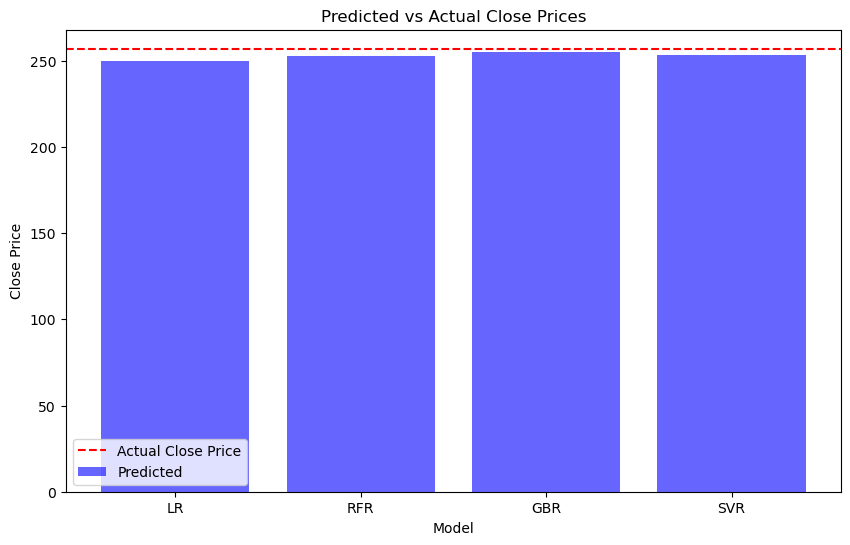

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(df_predictions['Model'], df_predictions['Predicted Close Price'], color='blue', alpha=0.6, label='Predicted')
plt.axhline(y=df_predictions['Actual Close Price'][0], color='red', linestyle='--', label='Actual Close Price')
plt.xlabel('Model')
plt.ylabel('Close Price')
plt.title('Predicted vs Actual Close Prices')
plt.legend()
plt.show()